In [57]:
import cv2
import numpy as np
import math
import cmath
from matplotlib import pyplot as plt


img= cv2.imread('question_3.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_out = img.copy()


def getGray(rgb):
    return rgb[0]


def setGray(color):
    return [color, color, color]
row, col , cha= img_out.shape

a = 0
b = 255
c = 50
d = 230
limit = 0;
for y in range(0,col):
    for x in range(0,row):
        valor= getGray(img_out[x,y])
        if(valor>=c+((limit*c)/100) and valor<=d-((limit*c)/100) ):
            img_out[x,y] =setGray((valor-c)*(((b-a)/(d-c))+a))
        elif( valor>=0 and valor<c+((limit*c)/100)):
            img_out[x,y]=setGray(0)
        elif(valor>d-((limit*c)/100) and valor<=b):
            img_out[x,y]=setGray(255)

def exponential(c,f):
    valor= int(c*math.log(1+f,10))
    if(valor > 255):
        return 255
    if(valor<0):
        return 0
    return valor
def raiz(c,f):
    valor= int(c*math.sqrt(f))
    if(valor > 255):
        return 255
    if(valor<0):
        return 0
    return valor
def exponential2(c,b,f):
    valor = c*( pow(b,f)-1)
    if(valor > 255):
        return 255
    if(valor<0):
        return 0
    return valor
def exponential3(c,b,f):
    valor = c*( pow(f,b))
    if(valor > 255):
        return 255
    if(valor<0):
        return 0
    return valor

cons=100
r = 1.5
for i in range(0,col):
    for j in range(0,row):
        img_out[j,i]=setGray(exponential(cons,getGray(img[j,i])))
        
def F1(L,n,Pn):
    L = L-1
    Pr = 0
    for i in range(0,n,1):
        Pr += Pn[i]
    return L*Pr

def F2(L,size,pn):
    for x in L:
        pn.append(x/size)



size = row * col
L = plt.hist(crop_img.ravel(),256,[0,256])[0]
pn = []
F2(L,size,pn)
S_n = []
for i in range (1,len(L)+1):
	S_n.append(int(F1(len(L),i,pn)))

for y in range(0,col):
	for x in range(0,row):
		img_out[x,y] = S_n[img[x,y]]

plt.axis("on")
plt.hist(img.ravel(),256,[0,256])
plt.show()
plt.axis("on")
plt.hist(img_out.ravel(),256,[0,256])
plt.show()
cv2.imshow('Coverted Image',img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

510 384


NameError: name 'crop_img' is not defined

In [ ]:
import numpy
import matplotlib.pyplot as plt
from copy import deepcopy
from PIL import Image
from math import cos, sin
import cv2

def getGrayColor(rgb):
    return rgb[0]


def setGrayColor(color):
    return [color, color, color]


img = Image.open('scannedFC.jpg')
img = numpy.asarray(img)

# copy list not reference
ct = deepcopy(img)

r1 = 5 #c
s1 = 0 #a
r2 = 90 # d
s2 = 255 #b

for i in range(len(img)):
    for j in range(len(img[i])):
        x = getGrayColor(img[i][j])
        if(0 <= x and x <= r1):
            ct[i][j] = setGrayColor(s1/r1 * x)
        elif(r1 < x and x <= r2):
            ct[i][j] = setGrayColor(((s2 - s1)/(r2 - r1)) * (x - r1) + s1)
        elif(r2 < x and x <= 255):
            ct[i][j] = setGrayColor(((255 - s2)/(255 - r2)) * (x - r2) + s2)

plt.subplot(2, 2, 1)
plt.imshow(img)
cv2.imwrite("test4.jpg",ct)
plt.subplot(2, 2, 2)
plt.imshow(ct)


plt.show()

min value 22 max value 202


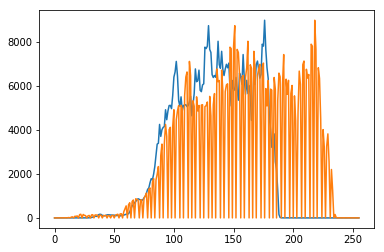

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('scannedFC.jpg')
row,cols,channels = img.shape
smallest = np.amin(img)
biggest = np.amax(img)
#print( "maximo:" + str(biggest)+"minimo"+str(smallest))

output = img.copy()
lista = []
for i in range (row):
    for j in range (cols):        
        lista.append(img[i][j][0])
        output[i][j] =  (img[i][j]-smallest)*(255/(biggest-smallest))

print("min value %s max value %s" % (smallest , biggest))

cv2.imwrite('test2.jpg',output)

cv2.imshow('input',img)
cv2.imshow('output',output)
cv2.waitKey(0)
cv2.destroyAllWindows()
histr = cv2.calcHist( [img],[0],None,[256],[0,256])
histr2 = cv2.calcHist( [output],[0],None,[256],[0,256])
plt.plot(histr)
plt.plot(histr2)
plt.show()
#plt.hist(output.ravel(),256,[0,256]); plt.show()
#plt.hist(img.ravel(),256,[0,256]); plt.show()


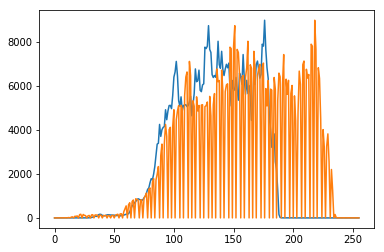

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('scannedFC.jpg')
row, cols, channels = img.shape
smallest = np.amin(img)
biggest = np.amax(img)

output = img.copy()
for i in range (row):
    for j in range (cols):        
        output[i][j] =  (img[i][j]-smallest)*(255/(biggest-smallest))
#('input', img)
cv2.imwrite('output.jpg', output)
histr = cv2.calcHist([img], [0], None, [256], [0, 256])
histr2 = cv2.calcHist([output], [0], None, [256], [0, 256])
plt.plot(histr)
plt.plot(histr2)
plt.show()

In [18]:

#CONTRAST STR    --- COLORES Y TACCA
import cv2
import numpy as np
from matplotlib import pyplot as plt
def contrast(img):
    img2 = img.copy()
    fils=len(img)
    cols=len(img[0])
    a=0
    b=255
    lista=[0]*256
    cont=fils*cols
    for x in range(fils):
        for y in range(cols):
            lista[img2.item(x,y,0)]=lista[img2.item(x,y,0)]+1
            lista[img2.item(x,y,1)]=lista[img2.item(x,y,1)]+1
            lista[img2.item(x,y,2)]=lista[img2.item(x,y,1)]+1
    lista2=[]
    for i in range(len(lista)):
        lista2=lista2+[i]*lista[i]
    x=5*cont/100
    y=95*cont/100

    c=0
    d=lista2[len(lista2)-1]

    print(x,y,c,d)
    for x in range(fils):
        for y in range(cols):
            t=(img.item(x,y,0)-c)*((b-a)/(d-c))+a
            if t<0:
                t=0
            if t>255:
                t=255
            img2.itemset((x, y,0), t)
            t=(img.item(x,y,1)-c)*((b-a)/(d-c))+a
            if t<0:
                t=0
            if t>255:
                t=255
            img2.itemset((x, y,1), t)
            t=(img.item(x,y,2)-c)*((b-a)/(d-c))+a
            if t<0:
                t=0
            if t>255:
                t=255
            img2.itemset((x, y,2), t)
    #img = img2
    return img2
img=cv2.imread('q_1.jpg') 
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_out = contrast(img)
kernel = np.ones((5, 5))

cv2.imwrite("contrast12.jpg",img_out)

32000.0 608000.0 0 215


True

In [21]:
#THRESHOLDING A COLORES --- TACCA

import cv2
import numpy as np
from matplotlib import pyplot as plt

def thre(img):
    Rxval=120
    Gxval=120
    Bxval=120
    fils = len(img)
    cols = len(img[0])
    bolin = 0
    for x in range(fils):
        for y in range(cols):
                    #RED
            if img.item(x,y,0)<=Rxval:
                bolin = bolin+1
                    #GREEN
            if img.item(x,y,1)<=Gxval:
                bolin = bolin+1
                    #BLUE
            if img.item(x,y,2)<=Bxval:
                bolin = bolin+1

            if bolin == 3:
                img.itemset((x,y,0),0)
                img.itemset((x,y,1),0)
                img.itemset((x,y,2),0)
            else:
                img.itemset((x,y,0),255)
                img.itemset((x,y,1),255)
                img.itemset((x,y,2),255)
            bolin = 0

    
    return img

img=cv2.imread('contrast12.jpg') 
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_out = thre(img)
kernel = np.ones((5, 5))

cv2.imwrite("thre30.jpg",img_out)

True